Coefficients: [1.58524044e-19]
Intercept: -4.034451653647778e-21


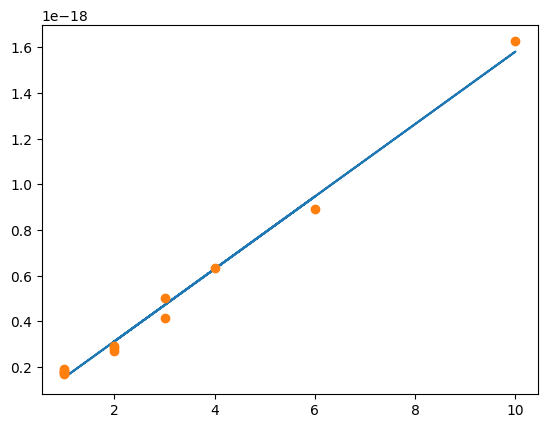

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = pd.read_excel('data.xlsx')
t_g = data['t_g']
t_e = data['t_e']
U = data['U']
delta = 5e-4
K_2 = 201.4
K_1 = 5.87e-9
q_0= 1.6e-19
v_g = delta / t_g
a_star = 4.07e-8
a_0 = np.sqrt(K_1 * v_g)
a = a_0 -a_star
U_0 = (t_e / (t_g + t_e)) * U
q = K_2 * (a**3/U_0)
n = q / q_0
filtered_n = n[n < 11][n > 0.8]
filtered_q= q[n < 11][n > 0.8]
round_n = np.round(filtered_n)
n = np.round(n)
# Create an instance of the LinearRegression model
model = LinearRegression()

# Reshape the round_n and filtered_q variables to 2D arrays
X = round_n.values.reshape(-1, 1)
y = filtered_q.values.reshape(-1, 1)

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept of the linear regression line
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)
plt.plot(round_n, coefficients * round_n + intercept)
plt.plot(round_n, filtered_q, 'o')

In [19]:
# Calculate the mean of x
x_mean = np.mean(X)

# Calculate the residuals
residuals = y - (coefficients * X + intercept)

# Calculate the standard error of the slope
n = len(X)
std_err_slope = np.sqrt(np.sum(residuals**2) / ((n - 2) * np.sum((X - x_mean)**2)))

# Calculate the standard error of the intercept  
std_err_intercept = std_err_slope * np.sqrt(np.sum(X**2) / n)

print("Standard error of slope:", std_err_slope)  
print("Standard error of intercept:", std_err_intercept)

Standard error of slope: 4.189169791511506e-21
Standard error of intercept: 1.5888287515736112e-20


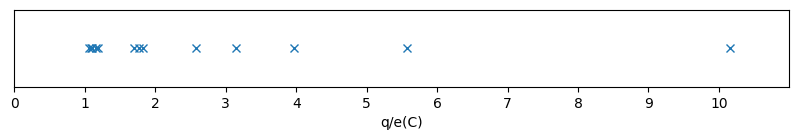

In [20]:
# Adjust the aspect ratio to 1:10
plt.figure(figsize=(10, 1))

# Plot the filtered values on the unit axis
plt.plot(filtered_n, [0] * len(filtered_n), 'x')

# Set the x-axis limits and ticks
plt.xlim(0.9, 11)
plt.ylim(-0.1, 0.1)
plt.xlabel('q/e(C)')
# Hide y-axis tick labels
plt.yticks([])
plt.xticks(np.arange(0, 11, 1))
# Show the plot
plt.show()


In [29]:
data['a(m)'] = a
data['U_0(V)'] = U_0
data['q(C)'] = q
data['n'] = n
data.to_csv('data.csv', index=False)

In [31]:
data_rounded = data.apply(lambda x: x.apply(lambda y: '{:.4e}'.format(y)))
data.to_csv('data.csv', index=False)